1. Data Load

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

# 기본 설정
z_dim = 100
batch_size = 128
lr = 0.0002
epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MNIST 데이터셋 로딩
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # [-1, 1] 범위로 정규화
])
dataloader = DataLoader(
    datasets.MNIST(root='./data', train=True, transform=transform, download=True),
    batch_size=batch_size, shuffle=True
)


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 339kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.90MB/s]


2. Generator / Discriminator

In [2]:
# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


3. Model init, loss, optimizer

In [3]:
# 모델 초기화
G = Generator().to(device)
D = Discriminator().to(device)

# 손실 함수와 최적화기
criterion = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
opt_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))


4. training

Epoch [1/50]  D Loss: 2.9016  G Loss: 3.1930
Epoch [2/50]  D Loss: 0.5224  G Loss: 2.5644
Epoch [3/50]  D Loss: 0.0290  G Loss: 4.5460
Epoch [4/50]  D Loss: 0.1941  G Loss: 2.7598
Epoch [5/50]  D Loss: 0.0878  G Loss: 2.1951
Epoch [6/50]  D Loss: 0.2411  G Loss: 3.1851
Epoch [7/50]  D Loss: 0.3609  G Loss: 2.9961
Epoch [8/50]  D Loss: 0.3847  G Loss: 2.2182
Epoch [9/50]  D Loss: 0.5683  G Loss: 1.0646
Epoch [10/50]  D Loss: 0.5109  G Loss: 2.6358


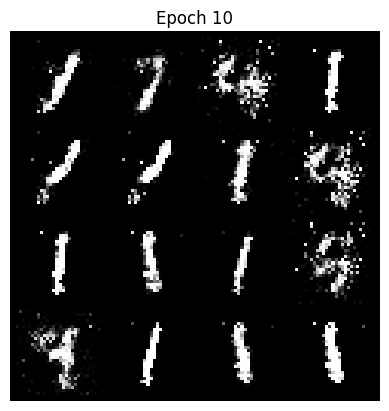

Epoch [11/50]  D Loss: 0.7838  G Loss: 1.5928
Epoch [12/50]  D Loss: 0.8594  G Loss: 2.2545
Epoch [13/50]  D Loss: 0.8618  G Loss: 1.6660
Epoch [14/50]  D Loss: 0.6663  G Loss: 1.3153
Epoch [15/50]  D Loss: 1.1285  G Loss: 2.7524
Epoch [16/50]  D Loss: 0.9850  G Loss: 2.0245
Epoch [17/50]  D Loss: 0.8678  G Loss: 1.7299
Epoch [18/50]  D Loss: 0.7852  G Loss: 1.9446
Epoch [19/50]  D Loss: 1.2230  G Loss: 1.2921
Epoch [20/50]  D Loss: 0.7666  G Loss: 1.6505


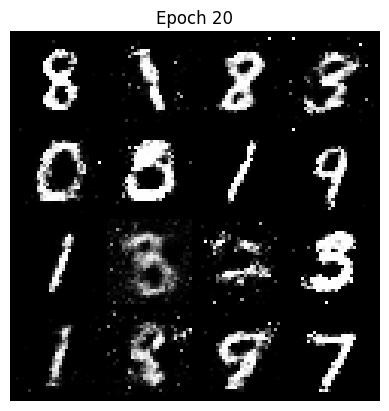

Epoch [21/50]  D Loss: 1.0633  G Loss: 1.6290
Epoch [22/50]  D Loss: 1.0519  G Loss: 1.0941
Epoch [23/50]  D Loss: 0.8905  G Loss: 1.3749
Epoch [24/50]  D Loss: 0.9429  G Loss: 1.4955
Epoch [25/50]  D Loss: 0.9882  G Loss: 1.0025
Epoch [26/50]  D Loss: 1.0646  G Loss: 1.2853
Epoch [27/50]  D Loss: 1.0318  G Loss: 1.3919
Epoch [28/50]  D Loss: 1.0151  G Loss: 0.8772
Epoch [29/50]  D Loss: 0.8851  G Loss: 1.3703
Epoch [30/50]  D Loss: 0.9693  G Loss: 1.4582


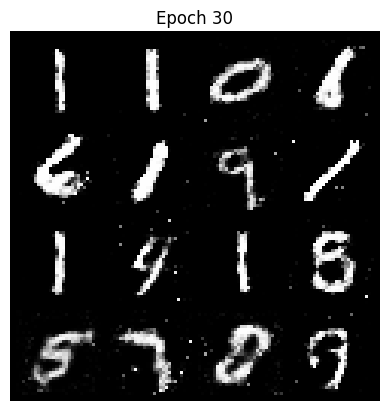

Epoch [31/50]  D Loss: 0.9338  G Loss: 1.7553
Epoch [32/50]  D Loss: 1.0968  G Loss: 1.0016
Epoch [33/50]  D Loss: 0.8832  G Loss: 1.5078
Epoch [34/50]  D Loss: 0.9663  G Loss: 1.3295
Epoch [35/50]  D Loss: 0.9658  G Loss: 1.5048
Epoch [36/50]  D Loss: 1.2566  G Loss: 0.9202
Epoch [37/50]  D Loss: 0.9628  G Loss: 1.4328
Epoch [38/50]  D Loss: 0.9412  G Loss: 1.0832
Epoch [39/50]  D Loss: 1.0113  G Loss: 1.3297
Epoch [40/50]  D Loss: 1.0971  G Loss: 1.3404


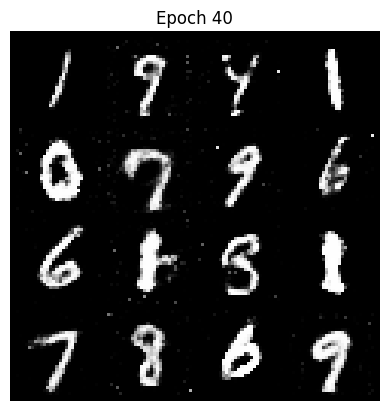

Epoch [41/50]  D Loss: 0.8875  G Loss: 1.5233
Epoch [42/50]  D Loss: 0.9873  G Loss: 1.0324
Epoch [43/50]  D Loss: 1.0857  G Loss: 1.4078
Epoch [44/50]  D Loss: 0.9430  G Loss: 1.4484
Epoch [45/50]  D Loss: 0.9539  G Loss: 0.9689
Epoch [46/50]  D Loss: 0.9316  G Loss: 1.2349
Epoch [47/50]  D Loss: 0.9919  G Loss: 1.1785
Epoch [48/50]  D Loss: 0.9214  G Loss: 1.2881
Epoch [49/50]  D Loss: 0.9186  G Loss: 1.3899
Epoch [50/50]  D Loss: 0.9410  G Loss: 1.4953


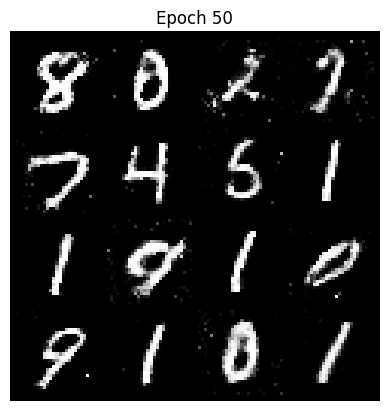

In [4]:
for epoch in range(epochs):
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.view(-1, 28*28).to(device)
        batch_size = real_imgs.size(0)

        # 진짜/가짜 라벨
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ====== Discriminator 학습 ======
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = G(z)

        real_loss = criterion(D(real_imgs), real_labels)
        fake_loss = criterion(D(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        opt_D.zero_grad()
        d_loss.backward()
        opt_D.step()

        # ====== Generator 학습 ======
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = G(z)
        g_loss = criterion(D(fake_imgs), real_labels)

        opt_G.zero_grad()
        g_loss.backward()
        opt_G.step()

    print(f"Epoch [{epoch+1}/{epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")

    # 샘플 시각화 (10에폭마다)
    if (epoch + 1) % 10 == 0:
        G.eval()
        with torch.no_grad():
            test_z = torch.randn(16, z_dim).to(device)
            gen_imgs = G(test_z).view(-1, 1, 28, 28)
            grid = torchvision.utils.make_grid(gen_imgs, nrow=4, normalize=True)
            plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
            plt.axis('off')
            plt.title(f"Epoch {epoch+1}")
            plt.show()
        G.train()
